In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
df2 = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\cluster2.parquet")
df3 = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\cluster3.parquet")
df4 = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\cluster4.parquet")
df5 = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\cluster5.parquet")

In [3]:
df = pd.concat([df2,df3, df4,df5], axis=1)
df = df.loc[:,~df.columns.duplicated()].copy()
df

,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay,Initial_cluster2,Normz_cluster2,std_cluster2,...,std_cluster3,MinMax_cluster3,Initial_cluster4,Normz_cluster4,std_cluster4,MinMax_cluster4,Initial_cluster5,Normz_cluster5,std_cluster5,MinMax_cluster5
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000,133,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552,134,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883,135,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733,136,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117,137,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733,44,Tuesday,1,1,0,...,1,0,3,0,1,0,1,1,0,4
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667,45,Tuesday,1,1,0,...,1,0,2,0,2,1,1,1,0,4
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317,46,Tuesday,1,1,0,...,2,2,2,0,2,1,2,4,2,0
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000,47,Tuesday,1,1,0,...,2,2,2,0,2,1,2,4,2,0


###### Check Silhoutte Scores

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [4]:

def fillna_value():
    z = df[['hour_of_the_week','Mean_Load']]
    Mean_Load = df.Mean_Load.mean()
    Max_Load = df.Max_Load.mean()
    Min_Load = df.Min_Load.mean()
    
    df['Mean_Load'].fillna(value=Mean_Load, inplace=True)
    df['Max_Load'].fillna(value=Max_Load, inplace=True)
    df['Min_Load'].fillna(value=Min_Load, inplace=True)
    
    return df

df = fillna_value()

In [5]:
df.isna().any()

Time                False
week_date           False
Max_Load            False
Min_Load            False
Mean_Load           False
hour_of_the_week    False
WeekDay             False
Initial_cluster2    False
Normz_cluster2      False
std_cluster2        False
MinMax_cluster2     False
Initial_cluster3    False
Normz_cluster3      False
std_cluster3        False
MinMax_cluster3     False
Initial_cluster4    False
Normz_cluster4      False
std_cluster4        False
MinMax_cluster4     False
Initial_cluster5    False
Normz_cluster5      False
std_cluster5        False
MinMax_cluster5     False
dtype: bool

In [6]:
for i in df.columns[7:]:
    array = df[i].to_numpy()
    silhouette_avg = silhouette_score(df[['hour_of_the_week', 'Mean_Load']], array)
    print(i ," : ", silhouette_avg )

Initial_cluster2  :  0.48996430615981185
Normz_cluster2  :  0.4489217990737207
std_cluster2  :  0.48010550906832383
MinMax_cluster2  :  0.4828396352902301
Initial_cluster3  :  0.5203225465941544
Normz_cluster3  :  0.3709699185320701
std_cluster3  :  0.5194781762230476
MinMax_cluster3  :  0.5197155181956612
Initial_cluster4  :  0.532579885021077
Normz_cluster4  :  0.3136184969669059
std_cluster4  :  0.5317168048784634
MinMax_cluster4  :  0.5323103819827553
Initial_cluster5  :  0.5334219533826399
Normz_cluster5  :  0.29733169413821836
std_cluster5  :  0.5275297022898429
MinMax_cluster5  :  0.529042511675535


In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
from sklearn.utils.validation import check_array
from sklearn.metrics import silhouette_score
marker_size = 200


### Visual Exploration

In [9]:
df

,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay,Initial_cluster2,Normz_cluster2,std_cluster2,...,std_cluster3,MinMax_cluster3,Initial_cluster4,Normz_cluster4,std_cluster4,MinMax_cluster4,Initial_cluster5,Normz_cluster5,std_cluster5,MinMax_cluster5
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000,133,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552,134,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883,135,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733,136,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117,137,Saturday,0,0,1,...,0,1,0,1,0,2,4,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733,44,Tuesday,1,1,0,...,1,0,3,0,1,0,1,1,0,4
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667,45,Tuesday,1,1,0,...,1,0,2,0,2,1,1,1,0,4
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317,46,Tuesday,1,1,0,...,2,2,2,0,2,1,2,4,2,0
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000,47,Tuesday,1,1,0,...,2,2,2,0,2,1,2,4,2,0


In [1]:
# df1 = df[df.std_cluster3==0]
# df2 = df[df.std_cluster3==1]
# df3 = df[df.std_cluster3==2]
# df4 = df[df.std_cluster3==3]


# plt.scatter(df1.Time, df1['Mean_Load'], color='green')
# plt.scatter(df2.Time, df2['Mean_Load'], color='red')
# plt.scatter(df3.Time, df3['Mean_Load'], color='black')
# plt.scatter(df4.Time, df4['Mean_Load'], color='yellow')


# # plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',s=marker_size,label='centroid')

# plt.xlabel('Time')
# plt.ylabel('Mean_Load')
# plt.legend()

No handles with labels found to put in legend.


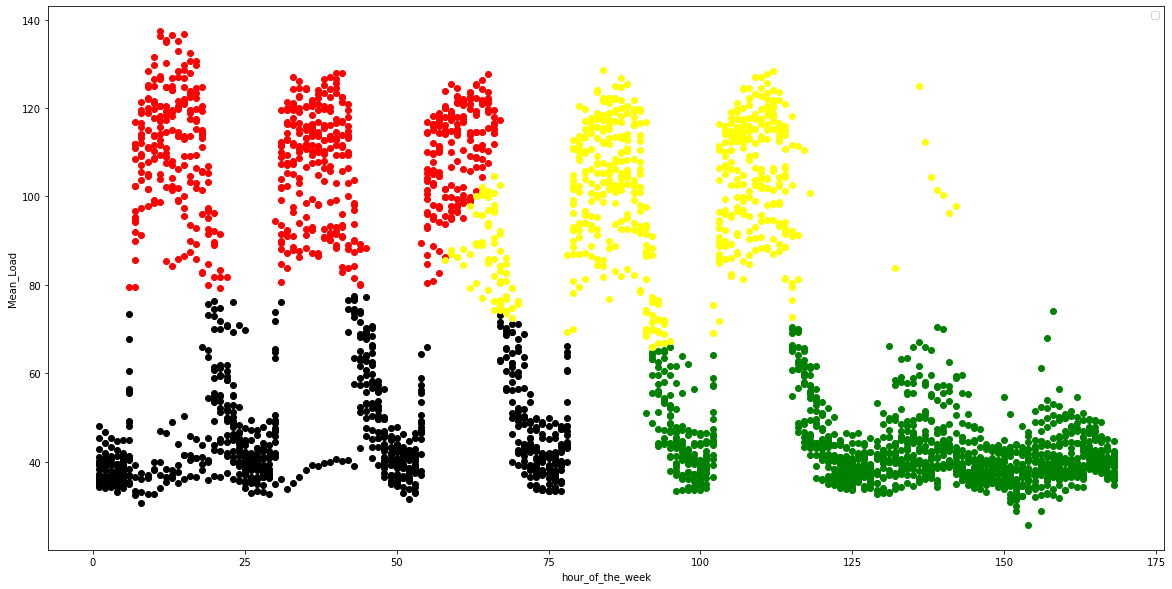

In [23]:
df1 = df[df.std_cluster4==0]
df2 = df[df.std_cluster4==1]
df3 = df[df.std_cluster4==2]
df4 = df[df.std_cluster4==3]


plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')
plt.scatter(df4.hour_of_the_week, df4['Mean_Load'], color='yellow')


# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',s=marker_size,label='centroid')

plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

No handles with labels found to put in legend.


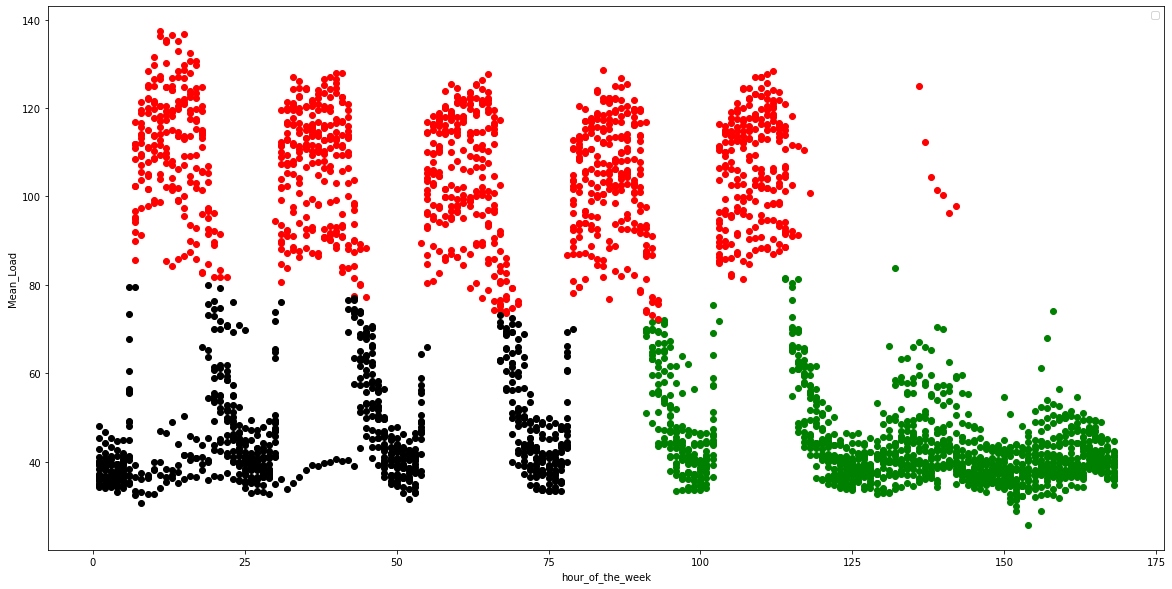

In [26]:
df1 = df[df.std_cluster3==0]
df2 = df[df.std_cluster3==1]
df3 = df[df.std_cluster3==2]
df4 = df[df.std_cluster3==3]


plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')
plt.scatter(df4.hour_of_the_week, df4['Mean_Load'], color='yellow')


# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',s=marker_size,label='centroid')

plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

In [31]:
df1.describe()

,Max_Load,Min_Load,Mean_Load,hour_of_the_week,Initial_cluster2,Normz_cluster2,std_cluster2,MinMax_cluster2,Initial_cluster3,Normz_cluster3,std_cluster3,MinMax_cluster3,Initial_cluster4,Normz_cluster4,std_cluster4,MinMax_cluster4,Initial_cluster5,Normz_cluster5,std_cluster5,MinMax_cluster5
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.0,1255.0,1255.000000,1255.000000,1255.000000,1255.000000,1255.0,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,49.185987,36.974757,43.595074,134.582470,0.0,0.0,0.983267,0.982470,0.023904,0.062151,0.0,0.998406,0.047012,1.052590,0.076494,2.028685,3.226295,0.327490,2.584861,1.415139
std,11.772895,7.960876,8.917431,21.918422,0.0,0.0,0.128321,0.131287,0.217428,0.347183,0.0,0.039904,0.211749,0.223302,0.473085,0.166987,1.575260,0.935905,0.821711,0.808010
min,29.150000,18.024000,25.642433,91.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000
25%,41.811000,32.166500,37.608492,120.500000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,3.000000,1.000000
50%,45.416000,35.860000,41.007300,137.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,3.000000,1.000000
75%,51.843500,40.122000,46.171100,153.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,2.000000,4.000000,0.000000,3.000000,1.000000
max,119.632000,79.893000,83.828567,168.000000,0.0,0.0,1.000000,1.000000,2.000000,2.000000,0.0,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
